## Problem Statement

To automate the data labelling of URLs into Malicious or Benign using Active Learning

## Data Overview

Taken data from kaggle https://www.kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls?resource=download

The dataset was acquired from various sources such as PhisTank etc.

#### Anatomy of URL

URLs allow Internet users to navigate from one website to another. They comprehensively represent access to content that it is stored in servers, somewhere in the world. The URLs are accessible by a simple click on a link, image … or simply by writing it via our browsers.

![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing dataset
df = pd.read_csv('/content/urldata.csv')

In [ ]:
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [3]:
#Removing the unnamed columns as it is not necesary.
urldata = df.drop('Unnamed: 0',axis=1)

In [ ]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [4]:
urldata.shape

(450176, 3)

The dataset has:
- 450176 rows
- 3 columns

In [ ]:
# Basic data check
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [ ]:
# checking for missing values
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

There are no missing values

## Feature Engineering

The following features will be extracted from the URL for classification.

1. Length Features:
   - Length Of Url
   - Length of Hostname
   - Length Of Path
   - Length Of First Directory
   - Length Of Top Level Domain
   
2. Count Features:
   - Count Of '-'
   - Count Of '@'
   - Count Of '?'
   - Count Of '%'
   - Count Of '.'
   - Count Of '='
   - Count Of 'http'
   - Count of 'https'
   - Count Of 'www'
   - Count Of Digits
   - Count Of Letters
   - Count Of Number Of Directories

3. Binary Features:
   - Use of IP or not
   - Use of Shortening URL or not

We will make use of Top Level Domain (TLD) to recognize certain elements of a website, such as its purpose, owner or geographical area. For example, a .edu top-level domain allows users to immediately identify that site as a higher educational institution.

![image.png](attachment:image.png)

#### 1. Length features

In [5]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.0 MB/s eta 0:00:00


In [6]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [7]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [8]:
#hostname length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [9]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [10]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [11]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return 0

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [12]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [13]:
# dropping tld column since we only need tld_length
urldata = urldata.drop("tld",1)

In [14]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3


#### 2. Count features

In [15]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [16]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [17]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [18]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [19]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [20]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [21]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [22]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [23]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [24]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [25]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [26]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features

In [27]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


#### 3. Binary features

In [28]:
import re

In [29]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 0
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [30]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 0
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

Data after extracting Binary Features

In [31]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


In [ ]:
df.to_csv(index=False)

In [ ]:
# Checking again for missing values
urldata.isnull().sum()

url                0
label              0
result             0
url_length         0
hostname_length    0
path_length        0
fd_length          0
tld_length         0
count-             0
count@             0
count?             0
count%             0
count.             0
count=             0
count-http         0
count-https        0
count-www          0
count-digits       0
count-letters      0
count_dir          0
use_of_ip          0
short_url          0
dtype: int64

## Data Visualization

### 1. Univariate Analysis

#### Label

Text(0, 0.5, 'Number Of URLs')

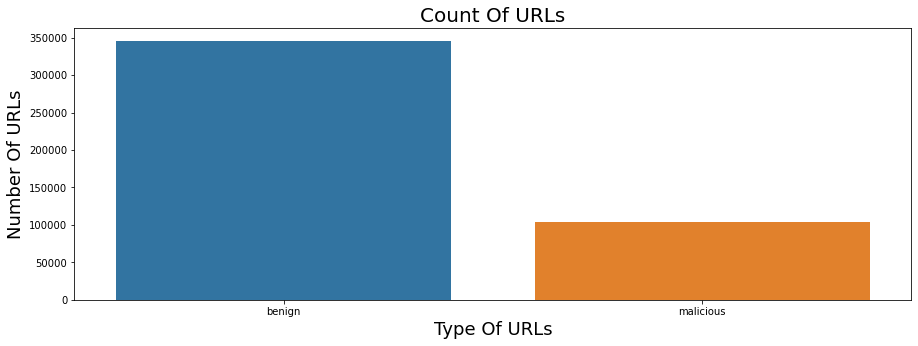

In [ ]:
# Count Plot
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [ ]:
# Percentage of values in each category
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


<b> Observations:</b>
- The data shows a class imbalance.
- There are 76% benign URL and 23% malicious URL.

#### URL Length

(0.0, 1500.0)

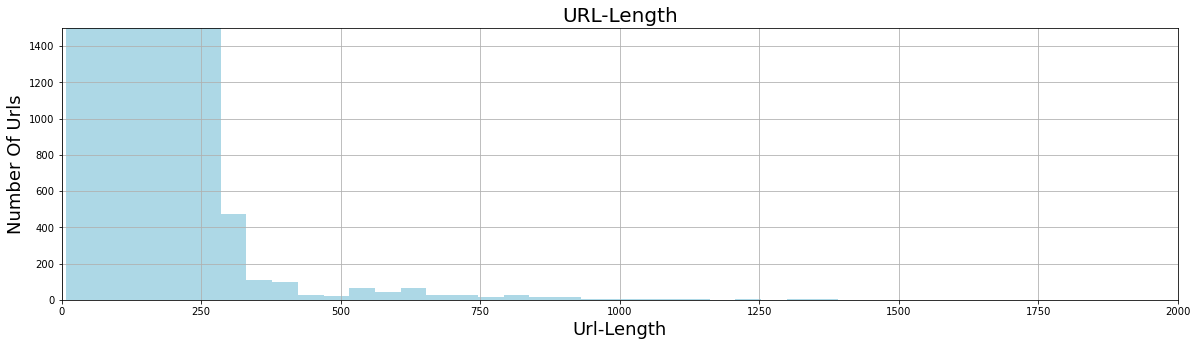

In [ ]:
# Histogram
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.grid()
plt.xlim(0,2000)
plt.ylim(0,1500)

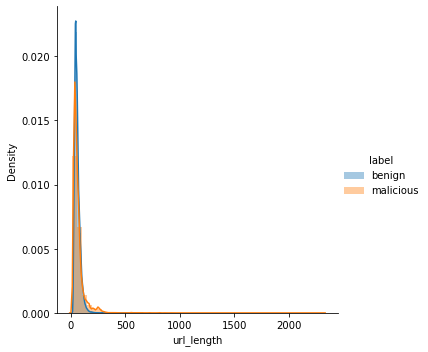

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"url_length").add_legend()

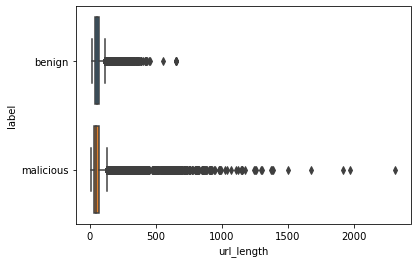

In [ ]:
# Boxplot
sns.boxplot(x=urldata["url_length"],y=urldata["label"])
plt.show()

<b>Observation</b>:   
- The length of URL are mostly between 0 to 500.
- Benign URLs are usually shorter than malicious URLs.
- Only malicious URLs are having lengths more than 500.

#### Hostname Length

(0.0, 1000.0)

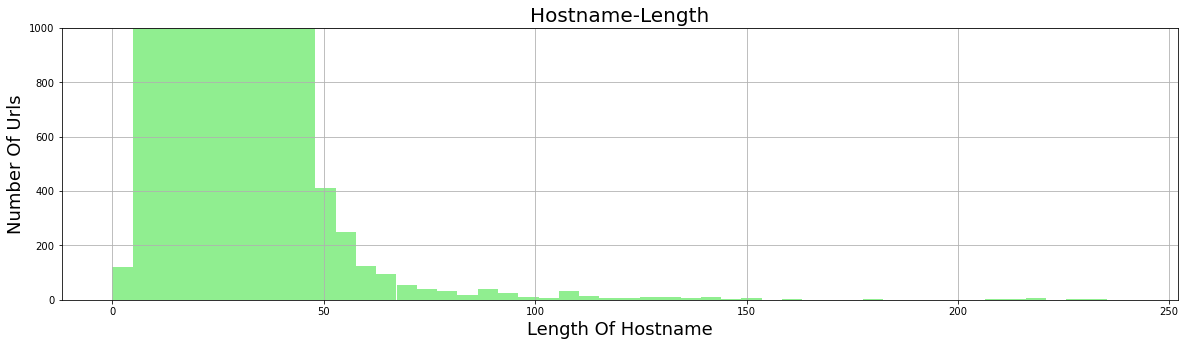

In [ ]:
# Histogram
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.grid()
plt.ylim(0,1000)

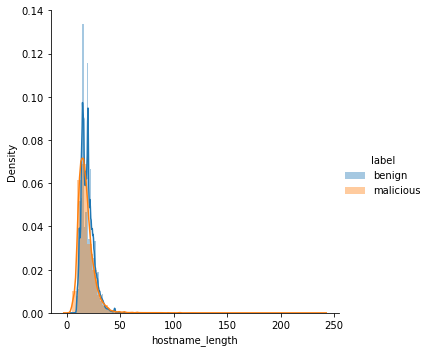

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"hostname_length").add_legend()

<AxesSubplot:xlabel='hostname_length', ylabel='label'>

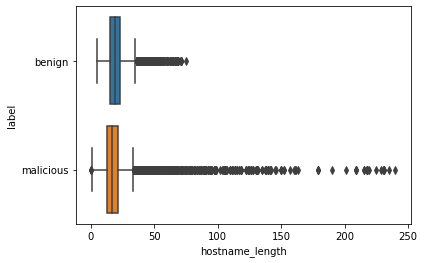

In [ ]:
# Boxplot
sns.boxplot(x=urldata["hostname_length"],y=urldata["label"])

<b>Observation</b>:  
- Most of the URLs are having hostname length ranging from 0 to 150.
- There is an overlap among the densities of Malicious and Beningn URLs having hostname length less than 50.

#### Length of path

(0.0, 1000.0)

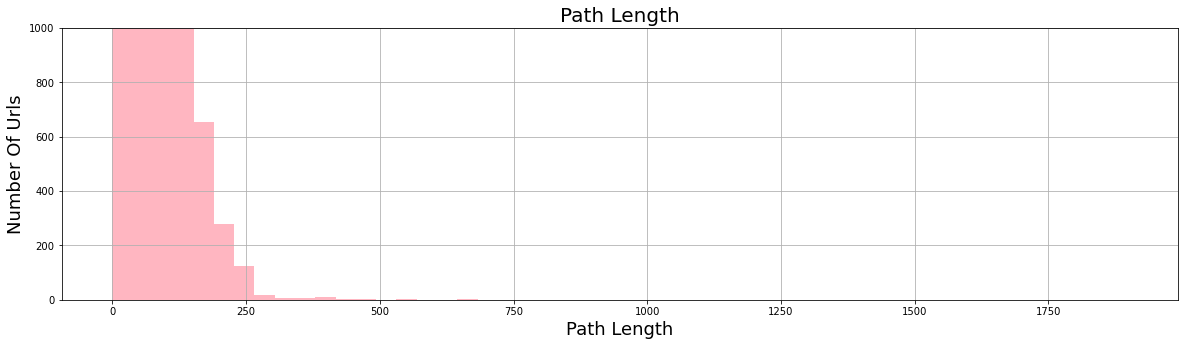

In [ ]:
# Histogram
plt.figure(figsize=(20,5))
plt.hist(urldata['path_length'],bins=50,color='Lightpink')
plt.title("Path Length",fontsize=20)
plt.xlabel("Path Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.grid()
plt.ylim(0,1000)

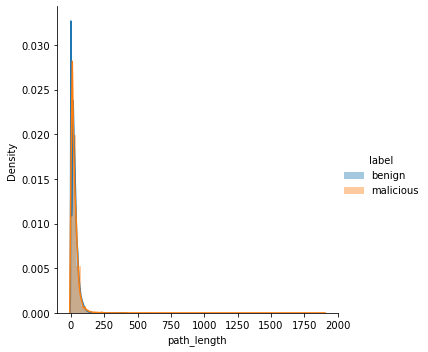

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"path_length").add_legend()

<AxesSubplot:xlabel='path_length', ylabel='label'>

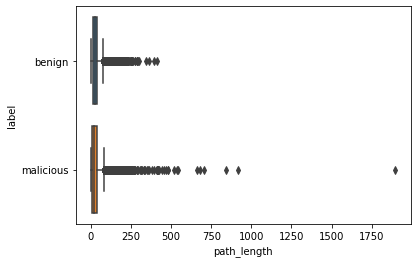

In [ ]:
# Boxplot
sns.boxplot(x=urldata["path_length"],y=urldata["label"])

<b>Observations:</b>
- Path lengths are mostly in the range of 0 to 250.

#### Length of first directory

(0.0, 1000.0)

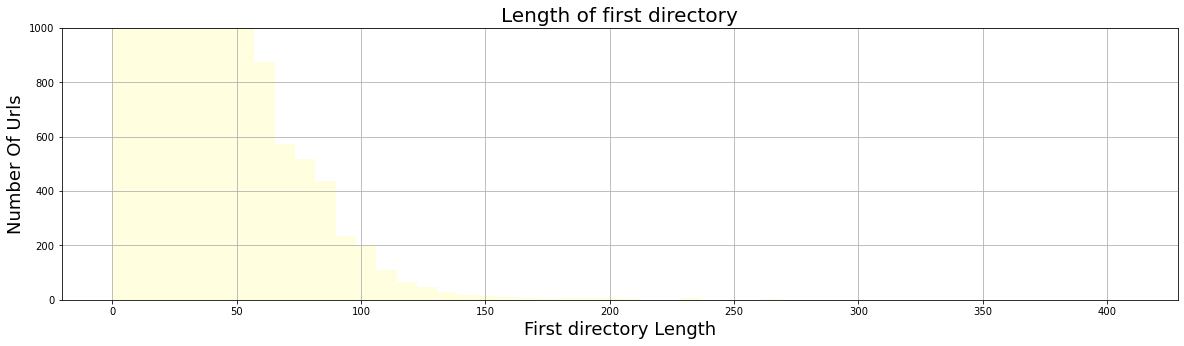

In [ ]:
# Histogram
plt.figure(figsize=(20,5))
plt.hist(urldata['fd_length'],bins=50,color='lightyellow')
plt.title("Length of first directory",fontsize=20)
plt.xlabel("First directory Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.grid()
plt.ylim(0,1000)

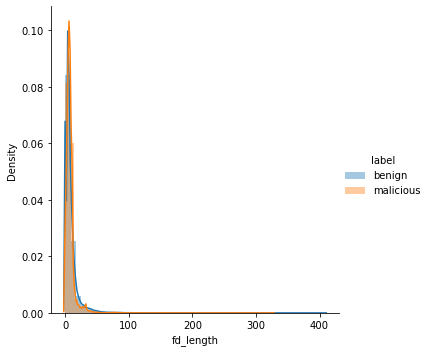

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"fd_length").add_legend()

<AxesSubplot:xlabel='fd_length', ylabel='label'>

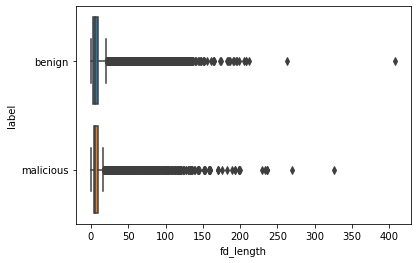

In [ ]:
# Boxplot
sns.boxplot(x=urldata["fd_length"],y=urldata["label"])

<b> Observations:</b>
- First directory lengths are mostly in the range of 0 to 150.

#### TLD Length

(0.0, 1000.0)

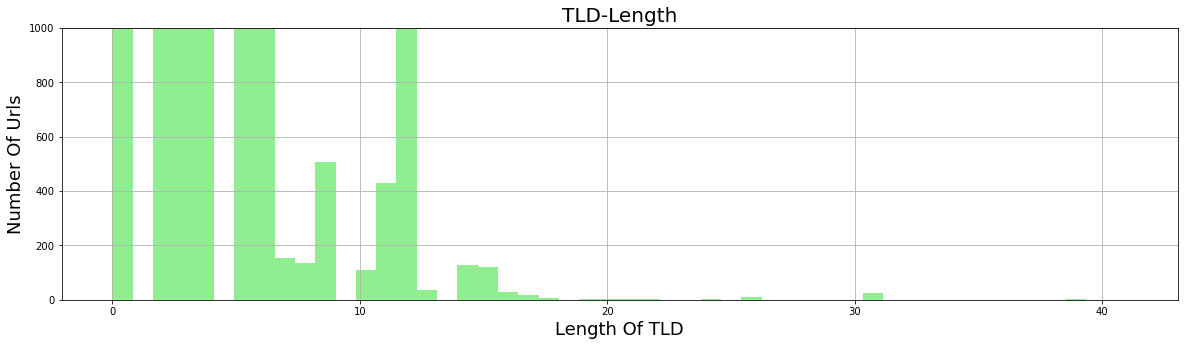

In [ ]:
# Histogram
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.grid()
plt.ylim(0,1000)

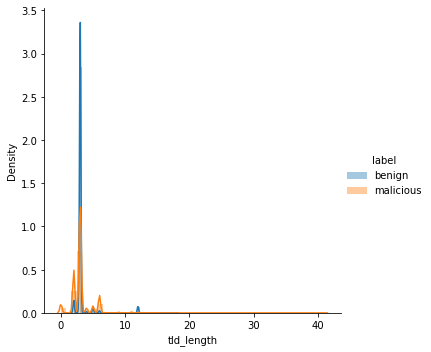

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"tld_length").add_legend()

<AxesSubplot:xlabel='tld_length', ylabel='label'>

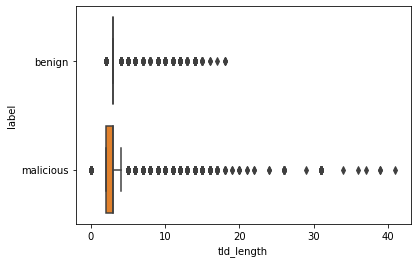

In [ ]:
# Boxplot
sns.boxplot(x=urldata["tld_length"],y=urldata["label"])

<b>Observations: </b>
- Top domain lengths are mostly in the range of 0 to 150.

### Count features

#### Count digits

Text(0, 0.5, 'Number Of URLs')

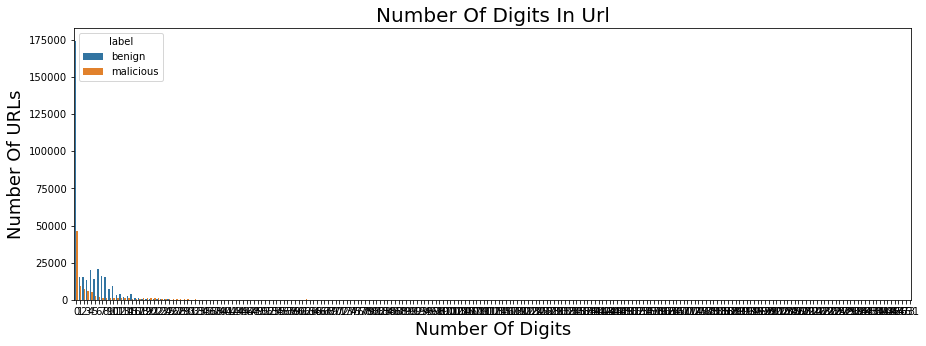

In [ ]:
# Count plot
plt.figure(figsize=(15,5))
plt.title("Number Of Digits In Url",fontsize=20)
sns.countplot(x='count-digits',data=urldata,hue='label')
plt.xlabel("Number Of Digits",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)


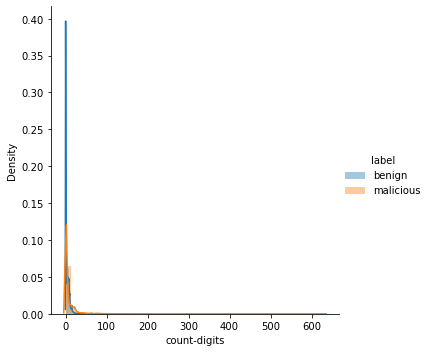

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"count-digits").add_legend()

<AxesSubplot:xlabel='count-digits', ylabel='label'>

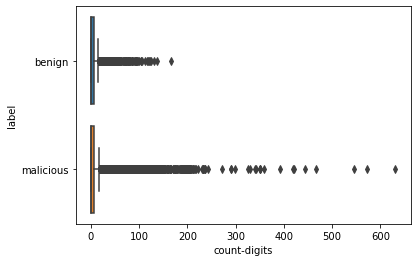

In [ ]:
# Boxplot
sns.boxplot(x=urldata["count-digits"],y=urldata["label"])

<b>Observations: </b>
- Number of digits are mostly less than 100 for both Malicious and Benign URLs.
- Malicious URLs are having more number of digits than Benign URLs.

#### Number of directories

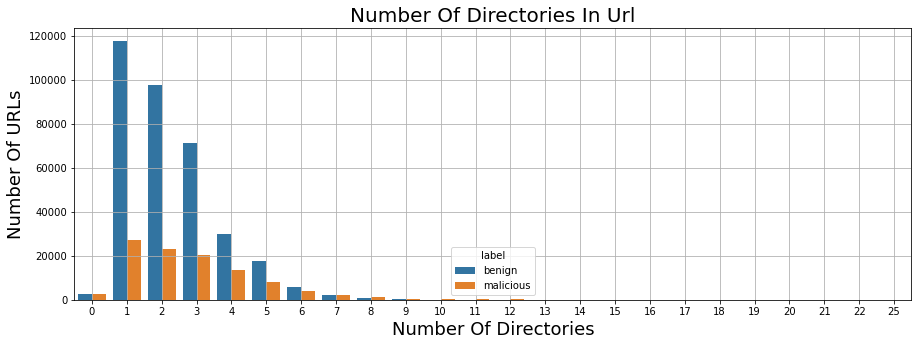

In [ ]:
# Count Plot
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.grid()

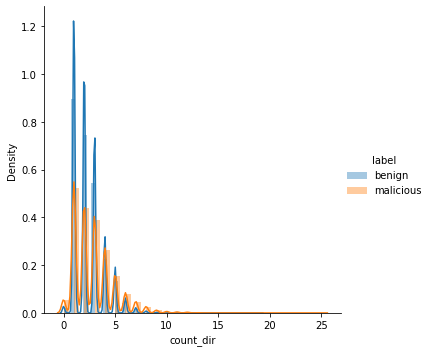

In [ ]:
# Density Plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"count_dir").add_legend()

<AxesSubplot:xlabel='count_dir', ylabel='label'>

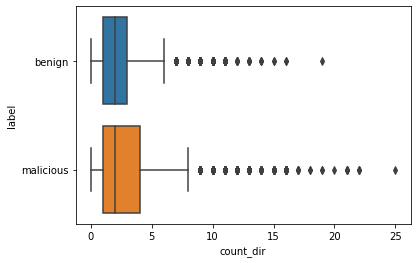

In [ ]:
# Boxplot
sns.boxplot(x=urldata["count_dir"],y=urldata["label"])

<b>Observations: </b>
- There is an overlap among both the categories.
- Number of directories are mostly less than 10 for both Malicious and Benign URLs.

#### count http

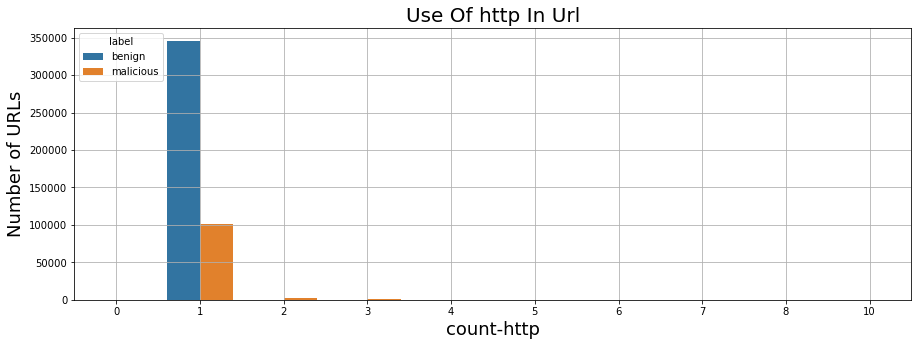

In [ ]:
# Count plot
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)
plt.grid()

<b>Observations: </b>
- Mostly the count of http is 1 in both categories but few malicious URLs also have the count like 2 and 3.

#### Count https

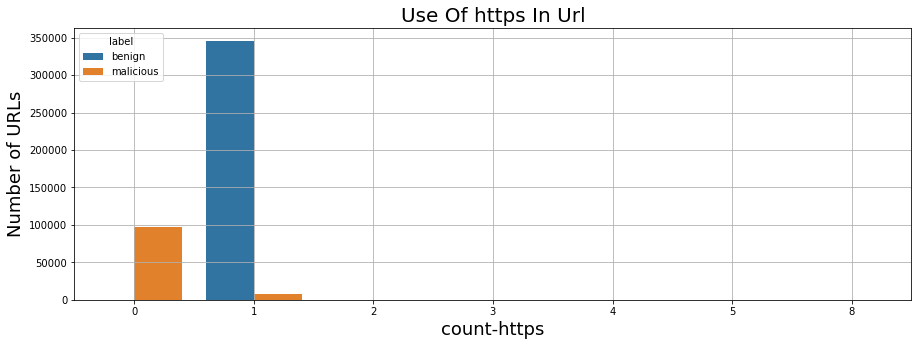

In [ ]:
# Count plot
plt.figure(figsize=(15,5))
plt.title("Use Of https In Url",fontsize=20)
plt.xlabel("Count Of https",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['count-https'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)
plt.grid()

<b>Observations: </b>
- Mostly the count of https is 1 for benign URLs whereas it is mostly 0 for malicious URLs.

#### Count www

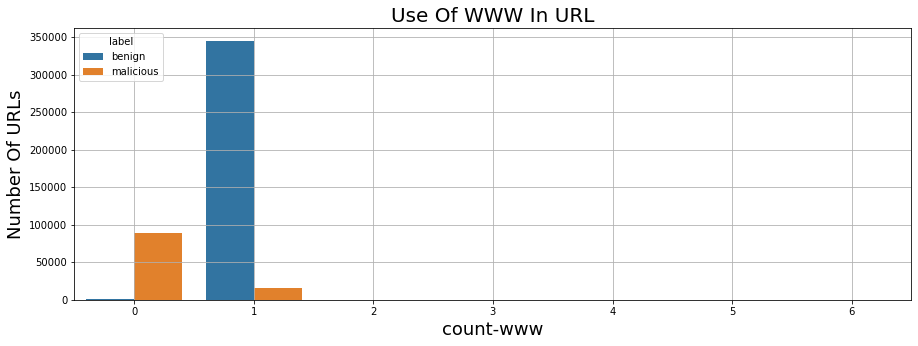

In [ ]:
# count plot
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylabel("Number Of URLs",fontsize=18)
plt.grid()

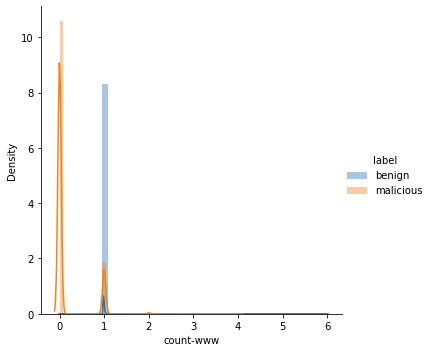

In [ ]:
# Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"count-www").add_legend()

<b>Observations: </b>
- Number of www is only 1 for benign URLs whereas 0 for malicious URLs.

#### count letters

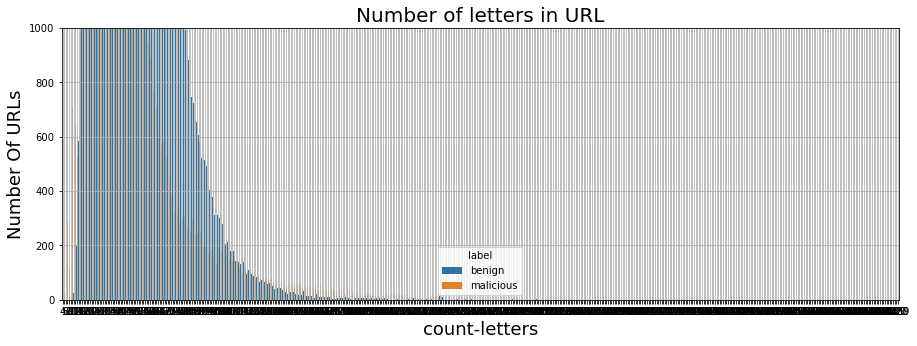

In [ ]:
# count plot
plt.figure(figsize=(15,5))
plt.title("Number of letters in URL",fontsize=20)
plt.xlabel("Count Of letters",fontsize=18)

sns.countplot(urldata['count-letters'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)
plt.grid()

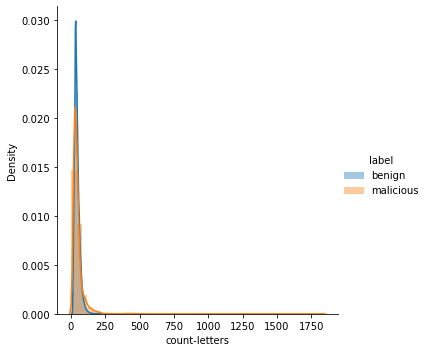

In [ ]:
#Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"count-letters").add_legend()

<AxesSubplot:xlabel='count-letters', ylabel='label'>

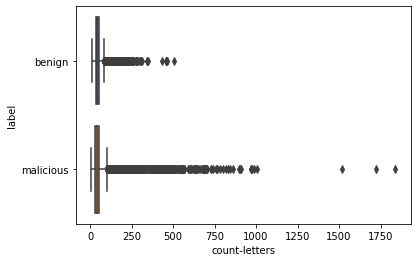

In [ ]:
# Boxplot
sns.boxplot(x=urldata["count-letters"],y=urldata["label"])

<b>Observations: </b>
- Number of letters are less than 250 for both benign and malicious URLs.

#### Count digits

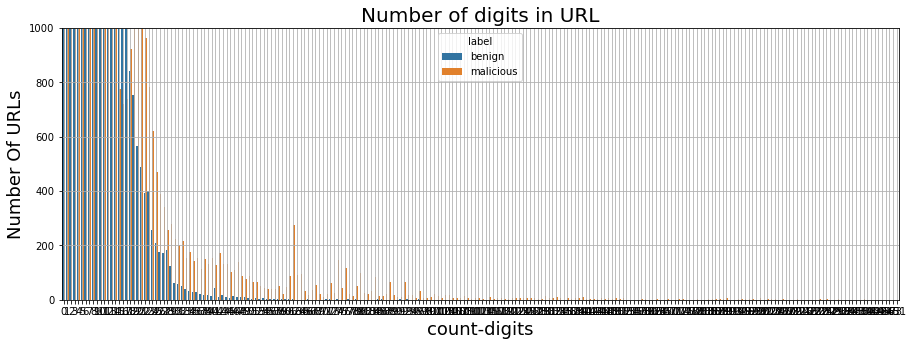

In [ ]:
# count plot
plt.figure(figsize=(15,5))
plt.title("Number of digits in URL",fontsize=20)
plt.xlabel("Count Of digits",fontsize=18)

sns.countplot(urldata['count-digits'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)
plt.grid()

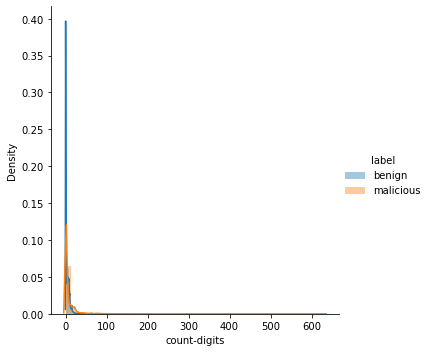

In [ ]:
#Density plot
sns.FacetGrid(urldata, hue='label',size=5).map(sns.distplot,"count-digits").add_legend()

<AxesSubplot:xlabel='count-digits', ylabel='label'>

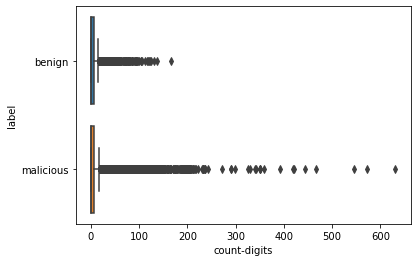

In [ ]:
# Boxplot
sns.boxplot(x=urldata["count-digits"],y=urldata["label"])

<b>Observation:</b>

- Most of the URLs are having less than 100 digits.
- There is an overlap among the densities of Malicious and Beningn URLs having digits less than 50.

### Binary features

Text(0, 0.5, 'Number of URLs')

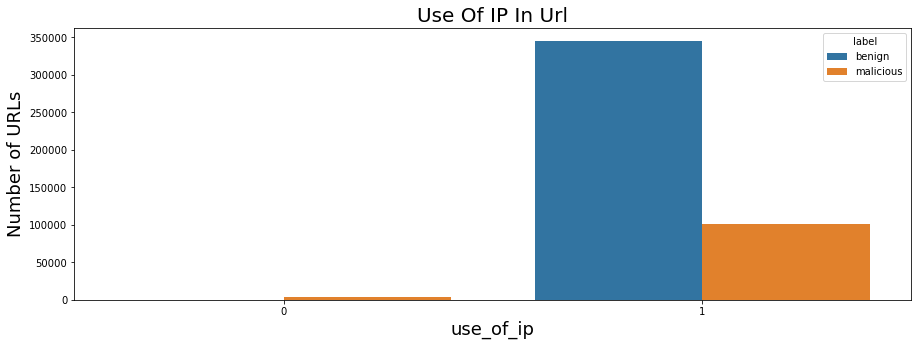

In [ ]:
# Use of IP in URL
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

<b>Observations:</b>
- Benign URLs usually do not contain IP address whereas some Malicious URLs are having IP address in the URL.

Text(0, 0.5, 'Number of URLs')

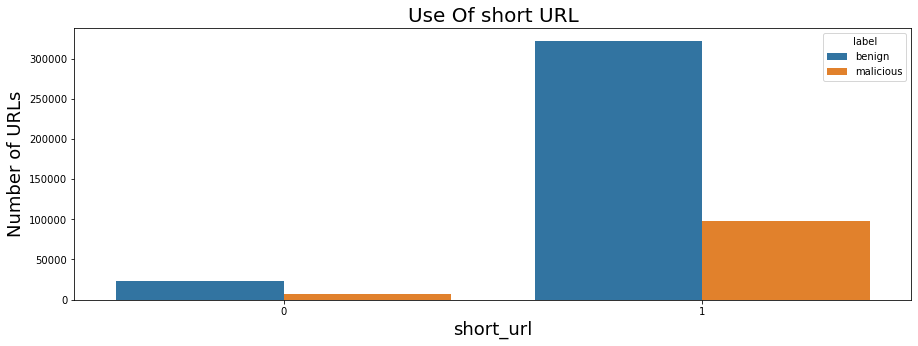

In [ ]:
# Use of shortening URL
plt.figure(figsize=(15,5))
plt.title("Use Of short URL",fontsize=20)
plt.xlabel("Use Of short URL",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['short_url'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

<b>Observations:</b>
- We could not establish a relationship between short URL and Benign/Malicious URLs since both of type of URLs are using short URLs.

## 2. Multivariate Analysis

<AxesSubplot:>

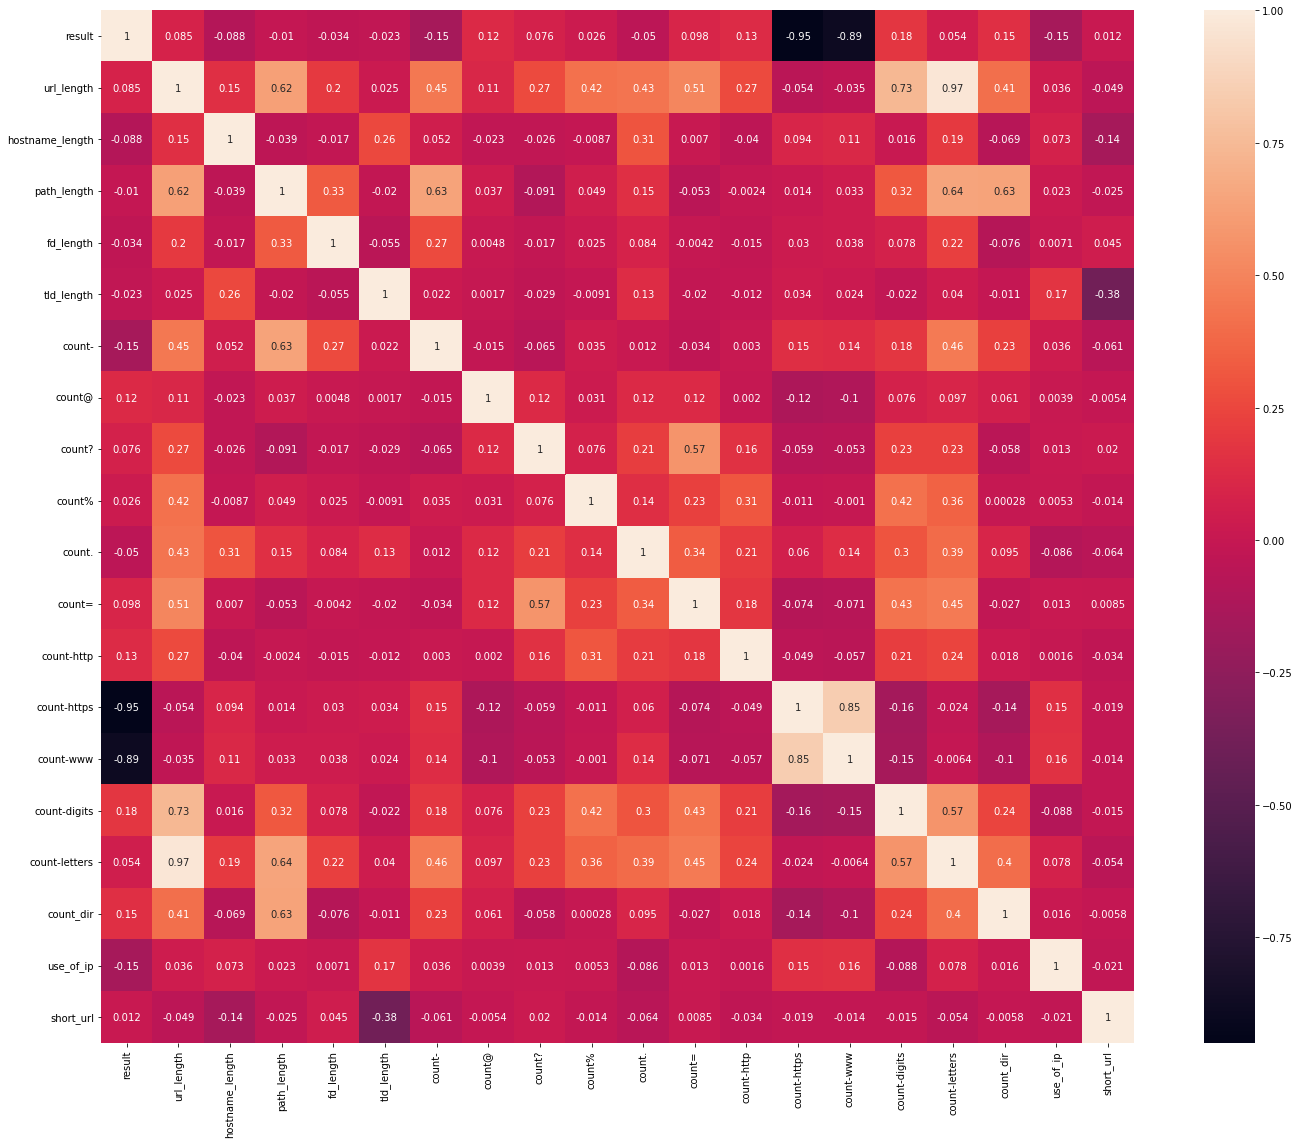

In [ ]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

<b>Observations: </b>
- Count_https and count_www are heavily related to the result.
- Tld_length and short_url are correlated with each other.

## Selecting 10 best features

In [32]:
X = urldata

In [33]:
Y = X['result']

In [34]:
X.drop('label', axis=1, inplace=True)
X.drop('result', axis=1, inplace=True)

In [35]:
X.drop('url', axis=1, inplace=True)

In [36]:
X.head()

,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0,1,1
1,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0,1,1
2,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0,1,1
3,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0,1,1
4,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0,1,1


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs          Score
14     count-digits  299669.948566
12      count-https   88039.042539
0        url_length   76322.321437
13        count-www   70852.935086
5            count-   52284.194299
15    count-letters   20951.845649
10           count=   13811.472433
16        count_dir    9733.710372
6            count@    8678.521897
1   hostname_length    8033.005956


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# from sklearn.datasets import make_friedman1

# # Create sample data
# X_train, Y_train = make_friedman1(n_samples=50, n_features=10, random_state=0)

# Create a base model
model = LinearRegression()

# Create the RFE model and select 5 features
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, Y)

#  Feature names
feature_names = ['url_length', 'hostname_length', 'path_length','first_directory_length',  'count-', 'count@','count-https', 'count-www', 'count-digits', 'count-letters',     'count_dir']

feature_ranking = fit.ranking_

# Print selected features and their ranks
print("Feature Name, Ranking:")
for feature, rank in zip(feature_names, feature_ranking):
    print(f"{feature}, {rank}")


Feature Name, Ranking:
url_length, 2
hostname_length, 8
path_length, 10
first_directory_length, 9
count-, 5
count@, 7
count-https, 1
count-www, 3
count-digits, 4
count-letters, 1
count_dir, 1


In [ ]:
feature_ranking

Num Features: 5: This indicates that the RFE has selected 5 features.

Selected Features: [False False True True True True False False True]: Each element in this array corresponds to whether the respective feature was selected (True) or not (False). In this case, the third, fourth, fifth, sixth, and ninth features were selected.

Feature Ranking: [5 2 1 1 1 1 3 4 1]: This array provides the ranking of features. The smaller the rank, the more important the feature. Here, the third, fourth, fifth, sixth, and ninth features have lower ranks, indicating higher importance.

So, based on the RFE process, it has identified the third, fourth, fifth, sixth, and ninth features as the most important ones, and they are selected for further analysis or modeling. The other features are considered less important in this context.

### Conclusion:
- Multiple URL features are created based on length, count and binary features.
- On visualizing, it is found that count_https and count_www are heavily related to the result.
- The top 10 features are count-digits, count-https, url_length, count-www, count-, count-letters, count=, count_dir, count@ and hostname_length.